<a href="https://colab.research.google.com/github/alik605001/Air_Pollution_2010-19/blob/main/Global_Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Global Air Pollution 2010-2019

This is a study of air pollution on a global scale, examining global geographical patterns and changes over time. 
I focus on the 10 countries with the highest pollution worldwide, as these are most in need of understanding and improvement. Subsequently, looking at factors that contribute to air pollution.


The air pollution data is sourced from the World Health Organisation -
https://www.who.int/data/gho/data/indicators/indicator-details/GHO/concentrations-of-fine-particulate-matter-(pm2-5)

The country statistical data is sourced from the OEDC -
https://stats.oecd.org/Index.aspx?DataSetCode=FACTBOOK2015_PUB

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [108]:
read = pd.read_csv('SDGPM25.csv')

Cleaning the dataframe to include only the columns needed and renaming to simplier terms.

In [109]:
df = read[['YEAR (CODE)', 'COUNTRY (DISPLAY)', 'RESIDENCEAREATYPE (DISPLAY)', 'Numeric', 'Low', 'High']]
df.rename(columns={"YEAR (CODE)": "Year", "COUNTRY (DISPLAY)": "Country Name", 'RESIDENCEAREATYPE (DISPLAY)': 'Area_type', 'Numeric': 'Total AP', 'Low': 'Low recorded AP', 'High': 'High recorded AP'}, inplace=True)
df.head()

,Year,Country Name,Area_type,Total AP,Low recorded AP,High recorded AP
0,2010,Afghanistan,Cities,92.79277,66.16662,128.44125
1,2010,Afghanistan,Total,68.96605,49.48253,96.51297
2,2010,Afghanistan,Rural,61.81464,42.68402,87.77431
3,2010,Afghanistan,Towns,69.67321,48.91039,98.81156
4,2010,Afghanistan,Urban,83.12652,60.36542,117.79976


To gain an overview of the data, I initially wanted to visualise the air pollution data by looking at the average over 2010-2019 globally.

In [110]:
totals = df.loc[(df.Area_type == 'Total')]
grouped = df.groupby('Country Name', as_index=False).agg({'Total AP':pd.Series.mean})
grouped.head()

,Country Name,Total AP
0,Afghanistan,73.130297
1,Albania,19.845897
2,Algeria,22.339834
3,Andorra,9.964680
4,Angola,26.599695


In [111]:
world_map = px.choropleth(grouped,
                          locationmode = 'country names',
                          locations='Country Name',
                          color='Total AP', 
                          hover_name='Country Name', 
                          color_continuous_scale=px.colors.sequential.matter,
                          title='A Map Showing Air Pollution 2010-2019')

world_map.update_layout(coloraxis_showscale=True,
                        coloraxis_colorbar=dict(
        title="Average Air Pollution 2010-2019 (micrograms per cubic meter)",))

world_map.show()

I then wanted to view this over time to see changes in global air pollution distribution 2010-2019.

In [112]:
selected_years = df.loc[(df.Area_type == 'Total') & ((df.Year == 2010) | (df.Year == 2019))]
selected_years_pivot = selected_years.pivot(index='Country Name',columns='Year',values='Total AP')
selected_years_pivot['diff'] = selected_years_pivot[2019] - selected_years_pivot[2010]
selected_years_pivot.head()

Year,2010,2019,diff
Country Name,,,
Afghanistan,68.96605,62.48616,-6.47989
Albania,21.94870,16.27997,-5.66873
Algeria,21.27312,22.68313,1.41001
Andorra,11.42903,8.52423,-2.90480
Angola,24.19840,27.16477,2.96637


In [113]:
selected_years_pivot.drop(columns=[2010, 2019], inplace=True)

In [114]:
diff_df = pd.merge(selected_years, selected_years_pivot, on='Country Name')

In [115]:
world_map = px.choropleth(diff_df,
                          locationmode = 'country names',
                          locations='Country Name',
                          color='diff', 
                          hover_name='Country Name', 
                          color_continuous_scale=px.colors.sequential.matter,
                          title='A Map Showing Air Pollution Change 2010-2019')



world_map.update_layout(coloraxis_showscale=True, coloraxis_colorbar=dict(
        title="Air Pollution Change (micrograms per cubic meter)",))

world_map.show()

This map shows a mix of countries increasing and decreasing their air pollution levels over 2010-2019.

I created the below graph to get a better understanding of total air pollution. It shows global air pollution has been fairly stable with individual countries increasing and decreasing their levels, almost cancelling each other out to a stable level.

This also includes the upper and lower recordings of air pollution, giving an idea of recording error bands.

In [116]:
num = df.groupby(['Year'], as_index=False).agg({'Total AP':pd.Series.mean})
high = df.groupby(['Year'], as_index=False).agg({'High recorded AP':pd.Series.mean})
low = df.groupby(['Year'], as_index=False).agg({'Low recorded AP':pd.Series.mean})

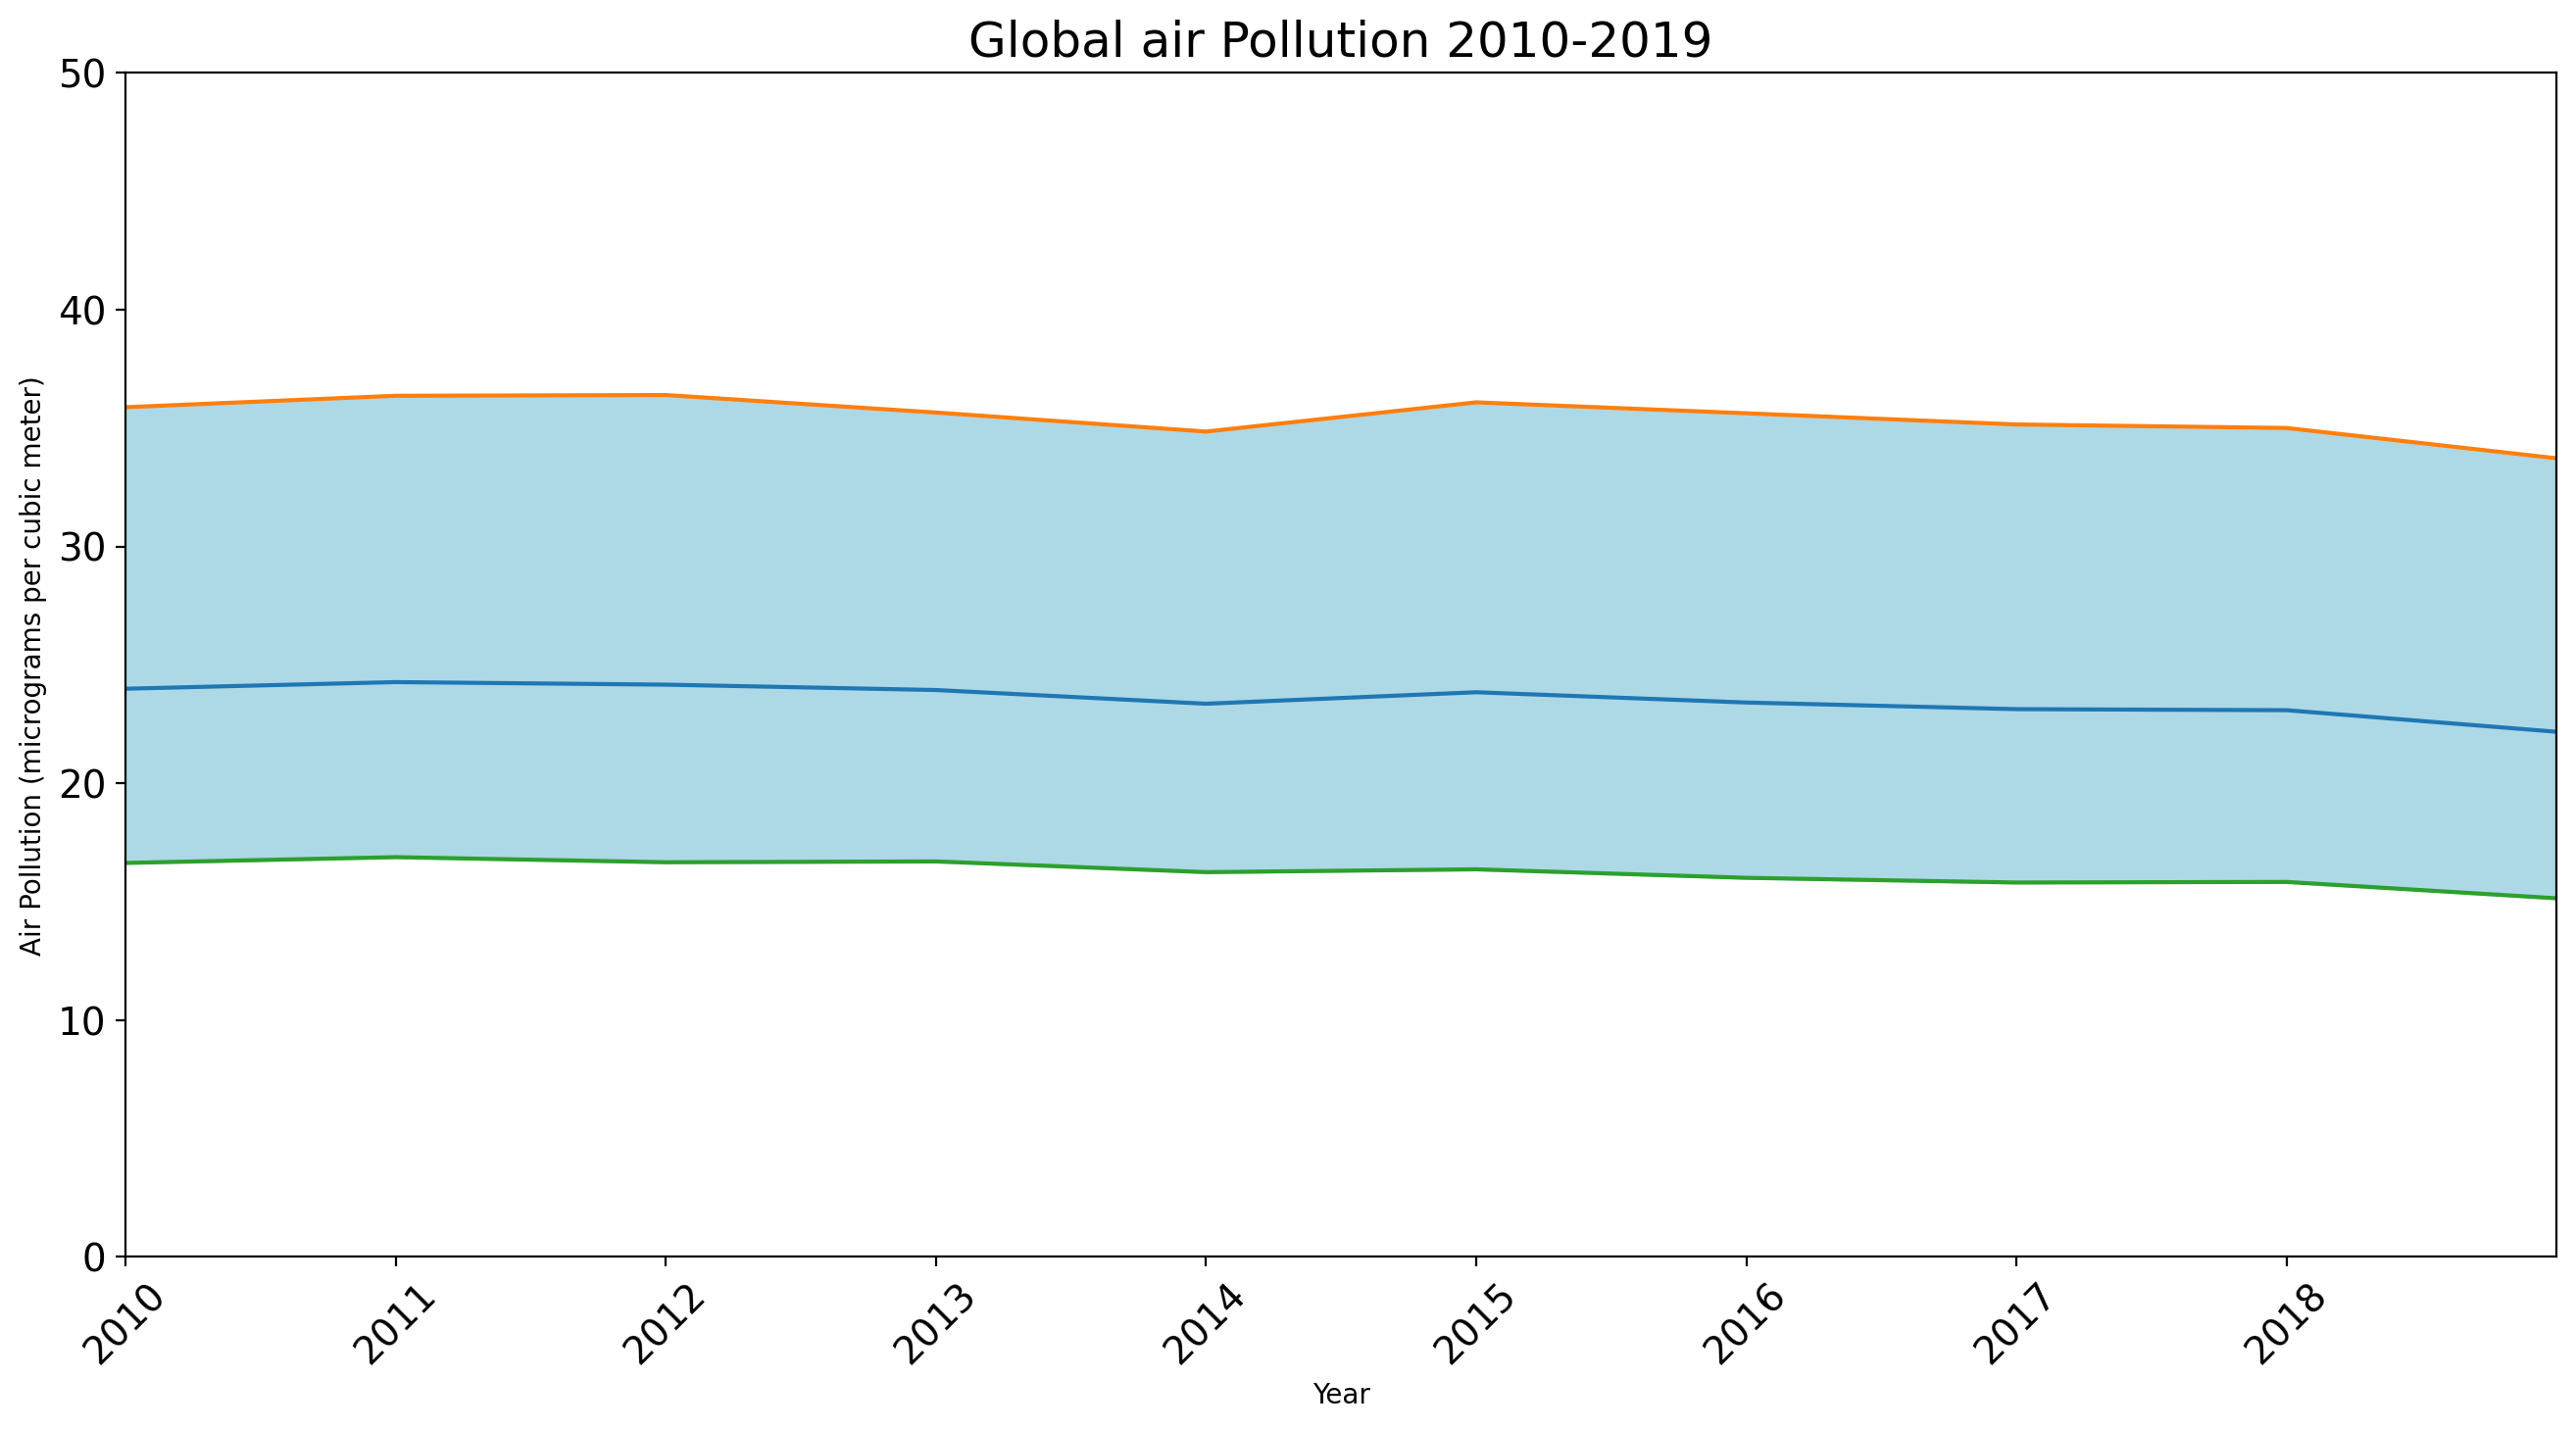

In [117]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Global air Pollution 2010-2019', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Air Pollution (micrograms per cubic meter)')
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(2010, 2019, step=1), 
           fontsize=14, 
           rotation=45)
plt.xlim(2010, 2019)
plt.ylim(0, 50)

x=num.Year
n = num['Total AP']
h = high['High recorded AP']
l = low['Low recorded AP']

plt.plot(x, n)
plt.plot(x, h)
plt.plot(x, l)
plt.fill_between(x, h, l, color='lightblue')

plt.show()

With such high levels of air pollution in certain countries, I decided to focus on the highest polluted countries as these are the areas that need the greatest attention and where improvements are needed.

In [118]:
grouped.sort_values(by='Total AP', ascending=False, inplace=True)
top_list = grouped['Country Name'][:10].values.tolist()

In [119]:
top = df[df['Country Name'].isin(top_list)]
top_total = top.loc[(top.Area_type == 'Total')]

<Figure size 720x432 with 0 Axes>

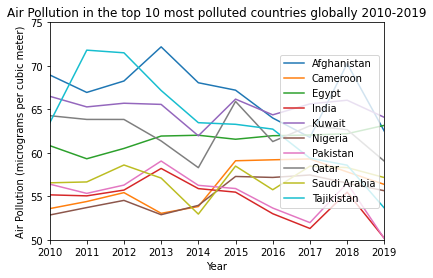

In [120]:
plt.figure(figsize=(10,6))
t=top_total[['Country Name','Year','Total AP']]
top_pivot=t.pivot(index='Year',columns='Country Name',values='Total AP')
top_pivot.plot.line(title='Air Pollution in the top 10 most polluted countries globally 2010-2019')
plt.xlabel('Year')
plt.ylabel('Air Pollution (micrograms per cubic meter)')
plt.xlim(2010, 2019)
plt.ylim(50, 75)
plt.legend(loc='right')
plt.show()

The figure above shows a wide variety of improvements and worsenings of air pollution in the highest polluted countries.

To gain further information of these top countries I wanted to see the location split of pollution to pinpoint what is causing these high overall levels. I will compare this with global pollution by area type.

In [121]:
top_loc = top.groupby(['Country Name', 'Area_type'], as_index=False).agg({'Total AP':pd.Series.mean})
top_loc.sort_values(by='Total AP', ascending=True, inplace=True)

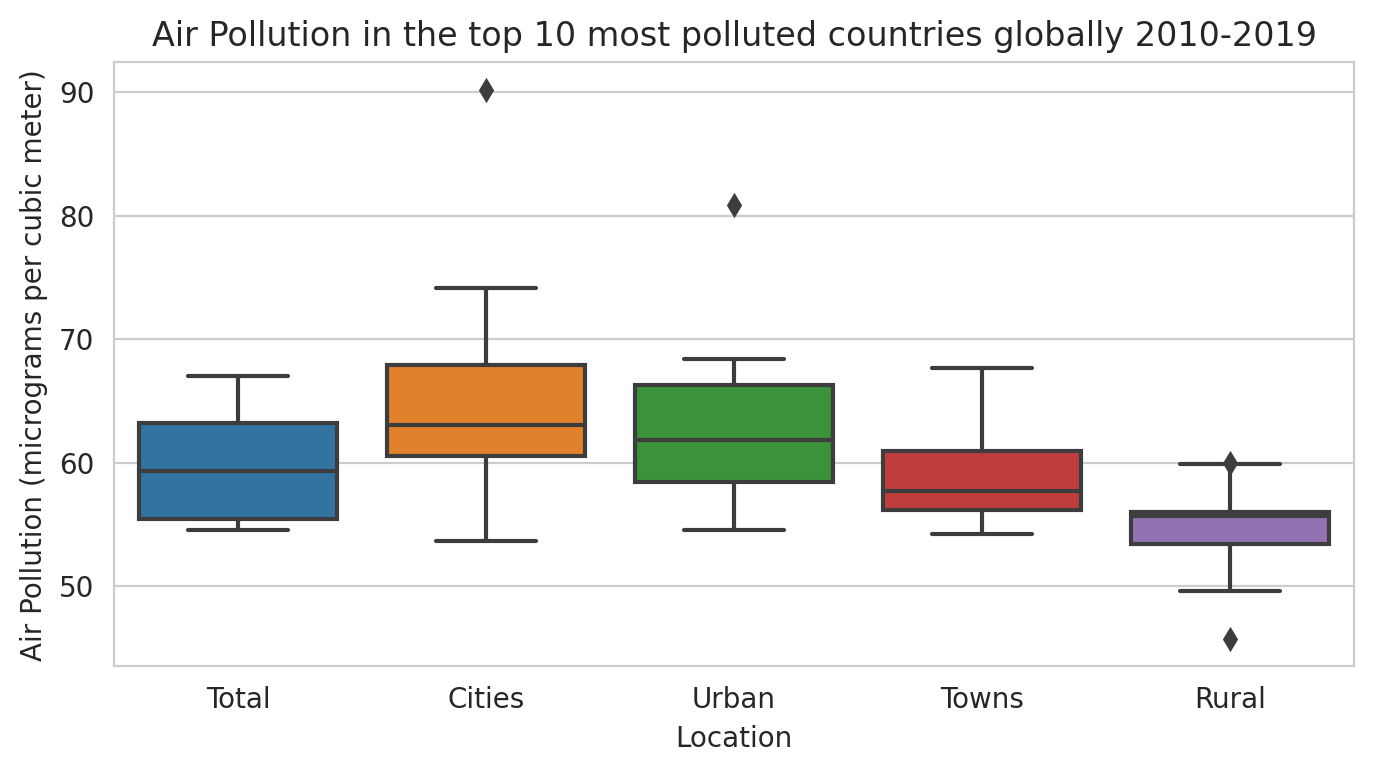

In [122]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=top_loc,
                x='Area_type',
                y='Total AP',
                order=['Total','Cities','Urban','Towns','Rural']).set(
                    title='Air Pollution in the top 10 most polluted countries globally 2010-2019',
                    xlabel='Location', 
                    ylabel='Air Pollution (micrograms per cubic meter)')
                


plt.show()

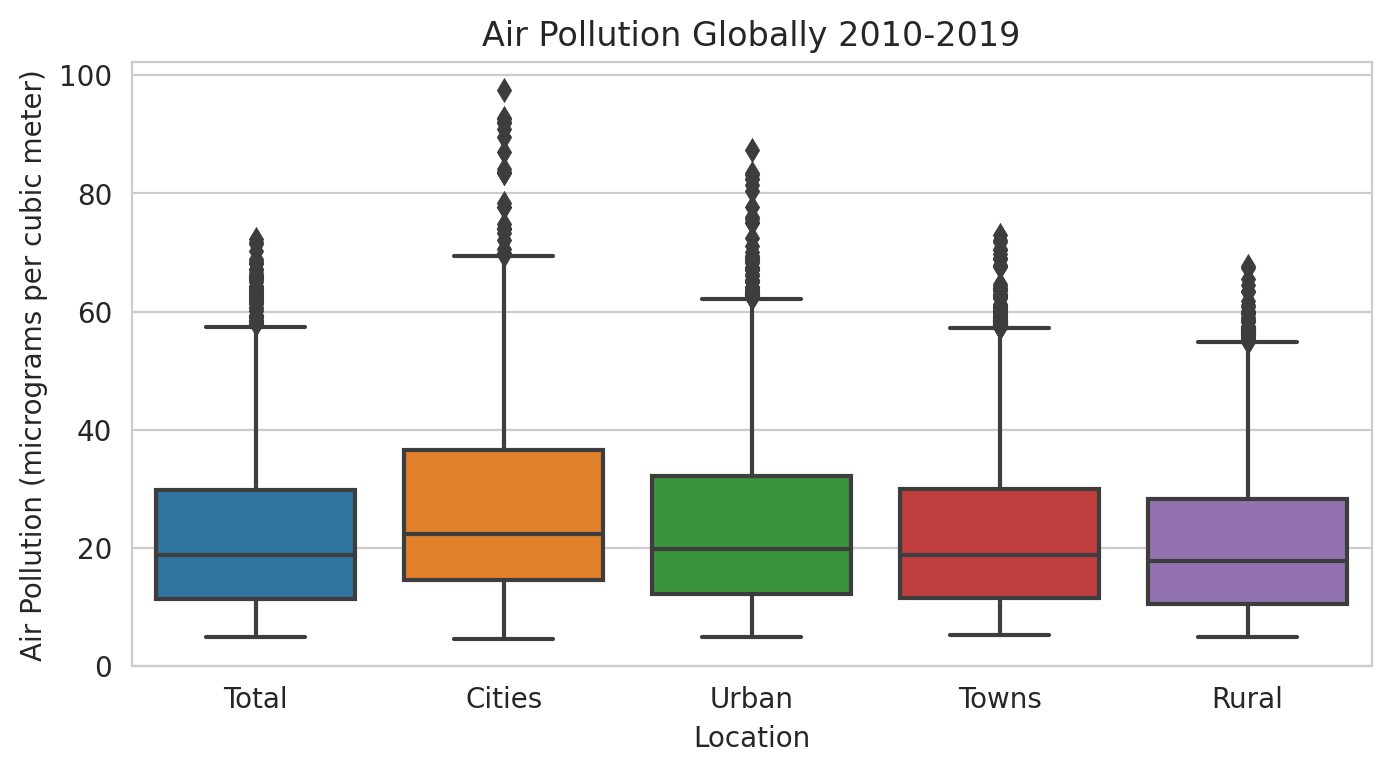

In [123]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df,
                x='Area_type',
                y='Total AP',
                order=['Total','Cities','Urban','Towns','Rural']).set(
                    title='Air Pollution Globally 2010-2019',
                    xlabel='Location', 
                    ylabel='Air Pollution (micrograms per cubic meter)')


plt.show()

The above demonstrates that globally the levels of air pollution are almost equal across urban and rural areas.

However, the top polluting countries have much higher levels in cities and urban areas compared with the rural parts of these countries. This suggests that the overall high pollution levels in these countries is dominated by urban pollution.

I then wanted to look further into the possible causes of air pollution by incorporating data from the OEDC. This dataset included many different factors for each country, largely sourced from censuses. Due to the different dates of data collection, I decided to use the average air pollution for each country over 2010-2019 and the most up-to-date census data available.

I found 4 factors which explain the greatest amount of variation in air pollution. These are urban population growth, % of GDP which is agriculture, forestry, and fishing, % of GDP which is industry (including construction) and fertility rate. However, these factors together only explain 13% of air pollution variance between countries, so other factors are likely to be at play and further work is needed.

In [124]:
factors_df = pd.read_csv('Factbook.csv')

In [125]:
factors_df.replace('..', np.nan, inplace=True)
factors_df.dropna(subset=['Country Name'], inplace=True)
factors_df.drop(columns=['Country Code'], inplace=True)

In [126]:
factors_pivot = factors_df.pivot(columns=['Series Name'], index=['Country Name'])
factors_pivot.columns = factors_pivot.columns.droplevel(0)
factors_pivot.dropna(axis=1,how='all', inplace=True)
factors_pivot.dropna(axis=0,how='all', inplace=True)
factors_pivot.head()

Series Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),...,"School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,61.325,25.77397074,43.01590668,58.8,0.1609764515,22.5,NaN,NaN,NaN,NaN,...,106.7010803,0.6360200047,55.42520905,50,652860,9.898450897,0.1047070348,8.5,2.97359589,3.919286985
Africa Eastern and Southern,93.4322205,12.68072758,4.929972533,69.41142588,0.9037641106,42.38937993,NaN,680.1503415,734.2187569,23.65172398,...,104.6796799,0.9412099719,42.50875092,58.50242464,15162080.12,18.58878388,15.21437809,26.82692308,NaN,4.090985482
Africa Western and Central,109.0057052,21.28386731,1.697610027,55.82824121,0.4858838963,19.20308105,NaN,183.4402065,602.378095,21.71212071,...,90.52320099,0.9349099994,45.39273071,59.31217778,9166260,NaN,14.22539608,15.25909091,NaN,3.967222452
Albania,19.5028,18.38934744,4.204460967,99.8,1.69224832,46,61.42125914,2309.366503,808.4558396,31.30427013,...,104.8127365,1.018630028,95.08659363,78.8889,28750,18.14437719,14.17392896,4.5,12.08254781,1.071413549
Algeria,9.5966,12.33621211,87.15212946,98.8,4.010034523,53.6,NaN,1368.621519,1333.136069,22.71346191,...,108.8458481,NaN,NaN,52.2222,2381741,NaN,7.105454488,18,0.4917593092,2.607529824


In [127]:
merged_df = pd.merge(grouped, factors_pivot, on='Country Name')
merged_df.set_index('Country Name', inplace=True)
merged_df.head()

,Total AP,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),...,"School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,73.130297,61.325,25.77397074,43.01590668,58.8,0.1609764515,22.5,NaN,NaN,NaN,...,106.7010803,0.6360200047,55.42520905,50,652860,9.898450897,0.1047070348,8.5,2.97359589,3.919286985
Tajikistan,65.702120,57.8652,20.86707336,16.70658683,94.8,1.008889049,29.3,15.4627893,1486.245831,336.8515224,...,100.8574371,0.9316999912,88.50041962,73.33333333,141380,NaN,22.27866109,7,17.99881433,2.905309095
Kuwait,63.221914,7.5776,0.3845798116,NaN,99.9,20.86194896,NaN,NaN,15297.81071,9006.504972,...,88.00608826,1.048840046,97.82772064,NaN,17820,NaN,10.71650911,19.4,NaN,2.829852402
Qatar,60.624157,9.2572,0.2300411099,446.4285714,100,32.76177492,37.5,NaN,16415.25154,19903.47511,...,103.538063,NaN,NaN,NaN,11490,NaN,4.723233138,8.7,NaN,1.506747953
Saudi Arabia,59.332472,6.87,2.196855588,974.1666667,98.7,14.61955333,27.6,NaN,9047.685513,6645.960208,...,100.712738,0.960340023,111.7947998,NaN,2149690,7.302103831,4.528371918,10.4,NaN,2.547828909


In [128]:
target = merged_df[['Total AP']]

In [129]:
features = merged_df[['Urban population growth (annual %)',
'Agriculture, forestry, and fishing, value added (% of GDP)',
'Industry (including construction), value added (% of GDP)',
'Fertility rate, total (births per woman)',]]

In [130]:
features.dropna(inplace=True)
lis = features.index.tolist()

In [131]:
target_nonan = target[target.index.isin(lis)]

In [132]:
regr = LinearRegression()
regr.fit(target_nonan, features)
rsquared = regr.score(target_nonan, features)
rsquared

0.13282902928136237

[Text(0.5, 0, 'Air Pollution (micrograms per cubic meter)')]

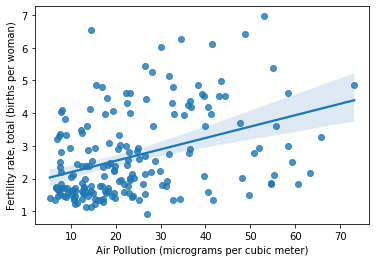

In [133]:
merged_df['Fertility rate, total (births per woman)'] = pd.to_numeric(merged_df['Fertility rate, total (births per woman)'])
sns.regplot(x="Total AP", y="Fertility rate, total (births per woman)", data=merged_df).set(
                    xlabel='Air Pollution (micrograms per cubic meter)')

[Text(0.5, 0, 'Air Pollution (micrograms per cubic meter)')]

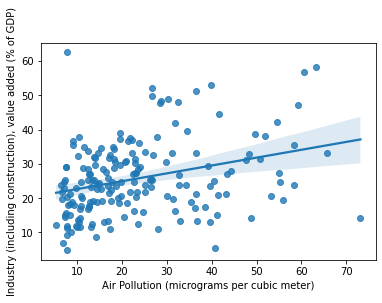

In [134]:
merged_df['Industry (including construction), value added (% of GDP)'] = pd.to_numeric(merged_df['Industry (including construction), value added (% of GDP)'])
sns.regplot(x="Total AP", y="Industry (including construction), value added (% of GDP)", data=merged_df).set(
                    xlabel='Air Pollution (micrograms per cubic meter)')

[Text(0.5, 0, 'Air Pollution (micrograms per cubic meter)')]

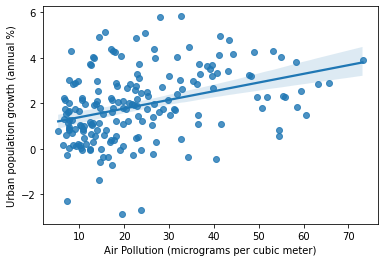

In [135]:
merged_df['Urban population growth (annual %)'] = pd.to_numeric(merged_df['Urban population growth (annual %)'])
sns.regplot(x="Total AP", y="Urban population growth (annual %)", data=merged_df).set(
                    xlabel='Air Pollution (micrograms per cubic meter)')